In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
import os

In [40]:
df = pd.read_csv('online_shoppers_intention.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [42]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [43]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [44]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [45]:
df.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [46]:
df.nunique(axis=1) # row 0 has 5 unique values.

0         5
1         7
2         8
3         9
4        10
         ..
12325    13
12326    10
12327    11
12328    11
12329     8
Length: 12330, dtype: int64

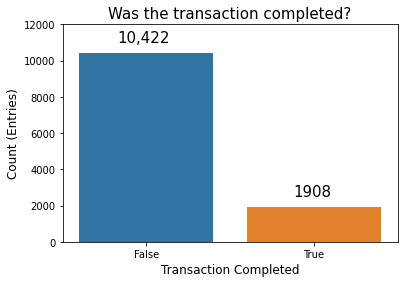

In [47]:
sns.countplot(df['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

In [48]:
df['Revenue'].value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

In [49]:
df['Month'].value_counts(dropna=False)

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

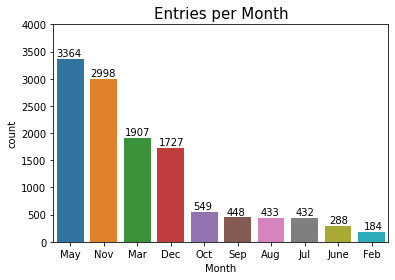

In [50]:
monthly = df['Month'].value_counts()
sns.countplot(df['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

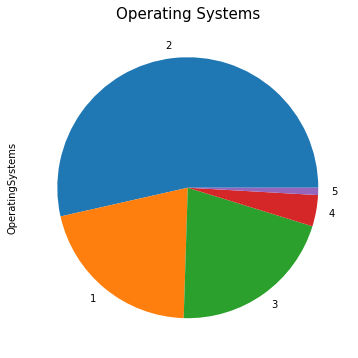

In [51]:
df['OperatingSystems'] = df['OperatingSystems'].replace([5,6,7,8],5)
os_plot = df['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

In [52]:
df['OperatingSystems'].value_counts(dropna=False)

2    6601
1    2585
3    2555
4     478
5     111
Name: OperatingSystems, dtype: int64

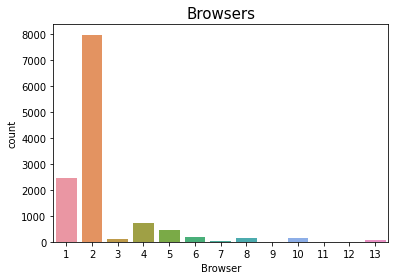

In [53]:
sns.countplot(df['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

In [54]:
df['Region'].value_counts(dropna=False)

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [55]:
shopping_clean = df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [57]:
shopping_clean.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,VisitorType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Returning_Visitor,False


In [58]:
visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [59]:
shopping_clean_merged.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Visitor_Type_Other,Visitor_Type_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,False,0,1


In [60]:
X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

## Naive Bayes Classifier

In [61]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB()

In [62]:
y_pred = gnb.predict(X_test) 

In [63]:
print("Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test, y_pred)*100,2))

Gaussian Naive Bayes model accuracy(in %): 84.63


## Random Forest Classifier

In [64]:
# Fit Random Forest Classifier to our Training Data
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=750, random_state=2)

In [65]:
# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

In [66]:
# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 90.23


In [67]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

The area under the ROC curve is: 0.89


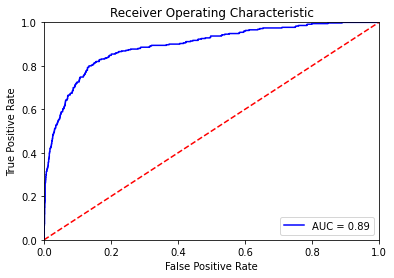

In [68]:
# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.16


## Stratifying Training Data

In [73]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified =\
train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [74]:
gnb_stratified = GaussianNB() 
gnb_stratified.fit(X_train_stratified, y_train_stratified)

GaussianNB()

In [75]:
# Make prediction using our test data and model
y_pred_stratified = gnb_stratified.predict(X_test_stratified) 

In [76]:
# Comparing our prediction to response values
print("Stratified Gaussian Naive Bayes model accuracy(in %):",
round(metrics.accuracy_score(y_test_stratified, y_pred_stratified)*100,2))

Stratified Gaussian Naive Bayes model accuracy(in %): 83.78


In [77]:
# Fit Random Forest Classifier to our Training Data
rfc_stratified = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_rfc_stratified = rfc_stratified.predict(X_test_stratified)
y_prob_rfc_stratified = rfc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediciton to response values
print('Stratified Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_rfc_stratified)*100,2))

Stratified Random Forest Classifier model accuracy(in %): 89.5


The area under the ROC curve for unbalanced data is: 0.89
The area under the ROC curve for stratified data is: 0.9


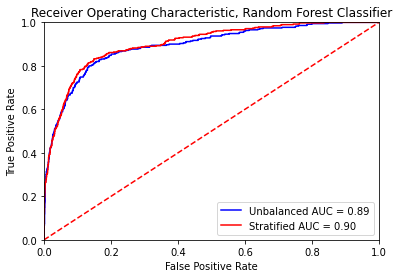

In [78]:
# Let us plot the ROC curve for the Random Forest Classifier for both the stratified data versus the unbalanced data.

roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve for unbalanced data is:', round(roc_value,2))

roc_value_stratified = roc_auc_score(y_test_stratified, y_prob_rfc_stratified)
print('The area under the ROC curve for stratified data is:', round(roc_value_stratified,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

fpr_strat, tpr_strat, threshold_strat = metrics.roc_curve(y_test_stratified, y_prob_rfc_stratified)
roc_auc_strat = metrics.auc(fpr_strat, tpr_strat)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'Unbalanced AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance

To see if we can improve our model, let us track the feature importance of each of our features to see which features matter to the outcome of the prediction

In [79]:
importances = rfc_stratified.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_stratified.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train_stratified.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 8 (0.693368)
2. Feature 7 (0.086168)
3. Feature 5 (0.058875)
4. Feature 6 (0.042850)
5. Feature 4 (0.040776)
6. Feature 1 (0.022842)
7. Feature 0 (0.020969)
8. Feature 11 (0.017604)
9. Feature 3 (0.008162)
10. Feature 2 (0.005109)
11. Feature 9 (0.003008)
12. Feature 10 (0.000269)


In [80]:
# Generating a dataframe for our feature importance

col_names = pd.Series([col for col in X_train_stratified.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted

,Importance
PageValues,0.693368
ExitRates,0.086168
ProductRelated_Duration,0.058875
BounceRates,0.042850
ProductRelated,0.040776
Administrative_Duration,0.022842
Administrative,0.020969
Visitor_Type_Returning_Visitor,0.017604
Informational_Duration,0.008162
Informational,0.005109


## We can see that the "Page Values" seems to be the most impactful feature by a large margin

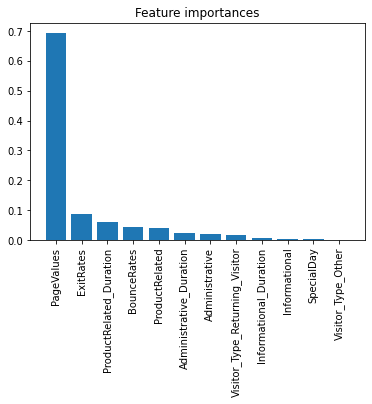

In [81]:
plt.title("Feature importances")
plt.bar(range(X_train_stratified.shape[1]),importances[indices])
plt.xticks(range(X_train_stratified.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train_stratified.shape[1]])
plt.show()